<h2 style="font-weight: 700; text-align: center;">Delta Learning using Stochastic and Batch gradient descent</h2>

In [21]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

<h3>Auxiliary Functions</h3>

In [22]:
def binary_sigmoidal(Y_in):
  return 1 / (1 + np.exp(-Y_in))

def find_Y_hat(x, w, b):
  if type(x) == type([1]) or type(x) == type((1, 2)):  # if list of list or list of tuples is used, individual list/tuple should be handled differently
    Y_in = np.dot(x, w) + b                            # layer of input neurons (if list of values passed as neuron)
  else:
    Y_in = x * w + b
  Y_hat = binary_sigmoidal(Y_in)
  
  return Y_hat

In [23]:
def delta_w(x, y, Y_hat, c):
  return(c * (y - Y_hat) * Y_hat * (1 - Y_hat) * x)    # derivative of binary sigmoidal is y_hat(1 - y_hat) and no, not y_in, y_hat is correct. Refer notes for more clarity

In [24]:
def delta_b(x, y, Y_hat, c):
  return(c * (y - Y_hat) * Y_hat * (1 - Y_hat))

<h3>Stochastic Gradient Descent</h3>

In [25]:
def stochastic_gradient_descent(X, Y, noofepochs = 300):
  w = -2; c = 1; b = -2;
  y_hat_mega_list = []
  error_mega_list = []
  weights_mega_list = []
  bias_mega_list = []

  for i in range(noofepochs):
    y_hat_list = []
    error_list = []
    weight_list = []
    bias_list = []

    for x, y in zip(X, Y):
      Y_hat = find_Y_hat(x, w, b)
      y_hat_list.append(Y_hat)
      error_list.append((y - Y_hat) ** 2)
      w += delta_w(x, y, Y_hat, c)
      b += delta_b(x, y, Y_hat, c)
      weight_list.append(w)
      bias_list.append(b)

    y_hat_mega_list.append(y_hat_list)
    error_mega_list.append(error_list)
    weights_mega_list.append(weight_list)
    bias_mega_list.append(bias_list)
    # print(f"Epoch {i + 1}, w = {w} & b = {b} | Y_hat: {y_hat_list}")
    
  return y_hat_mega_list, error_mega_list, weights_mega_list, bias_mega_list

#### Caller

In [26]:
X = [0.5, 2.5]
Y = [0.2, 0.9]
df = pd.DataFrame([(x, y) for x, y in zip(X, Y)], columns = ['X', 'Y'])
noofepochs = 500
y_hats, errors, weights, biases = stochastic_gradient_descent(X, Y, noofepochs)
df.head()

,X,Y
0,0.5,0.2
1,2.5,0.9


<h3>Observations / Results</h3>

In [27]:
plt.rcParams.update({'figure.figsize': (15, 6)})

#### Individual errors v/s Epochs

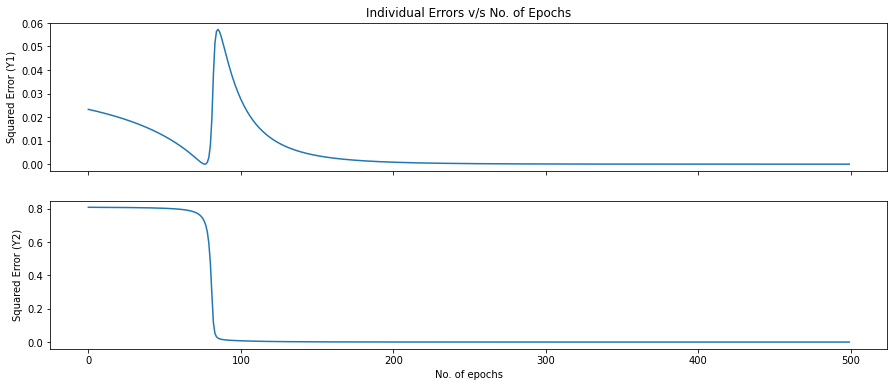

In [28]:
fig, ax = plt.subplots(2, 1, sharex = True, sharey = False)
ax[0].plot([i for i in range(noofepochs)], [i[0] for i in errors])
ax[1].set_xlabel("No. of epochs")
ax[0].set_ylabel('Squared Error (Y1)')
ax[1].set_ylabel('Squared Error (Y2)')
ax[1].plot([i for i in range(noofepochs)], [i[1] for i in errors])
ax[0].set_title("Individual Errors v/s No. of Epochs")
plt.show()

#### MSE v/s Epochs

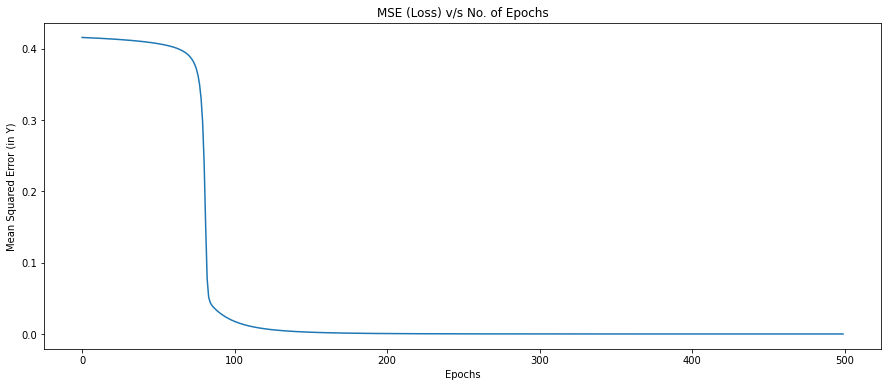

In [29]:
plt.title("MSE (Loss) v/s No. of Epochs")
plt.plot([i for i in range(noofepochs)], [np.mean(i) for i in errors])
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (in Y)')
plt.show()

#### Accuracy v/s Epochs

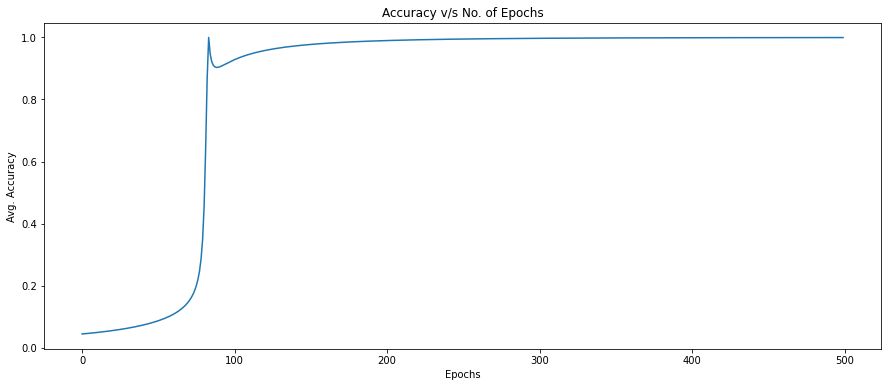

In [30]:
acc = [1 - np.abs((np.mean(Y) - np.mean(i)) / np.mean(Y)) for i in y_hats]
plt.title("Accuracy v/s No. of Epochs")
plt.plot([i for i in range(noofepochs)], acc)
plt.xlabel('Epochs')
plt.ylabel('Avg. Accuracy')
plt.show()

#### Weights (Avg.) v/s No. of epochs

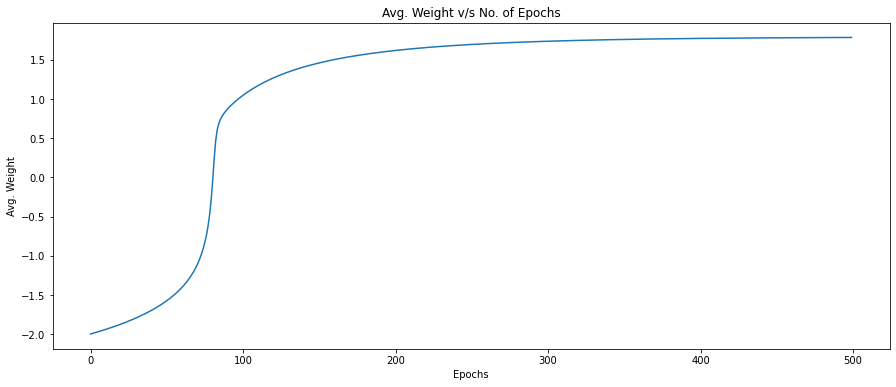

In [31]:
plt.title("Avg. Weight v/s No. of Epochs")
plt.plot([i for i in range(noofepochs)], [np.mean(w) for w in weights])
plt.xlabel('Epochs')
plt.ylabel('Avg. Weight')
plt.show()

#### Loss v/s Weights

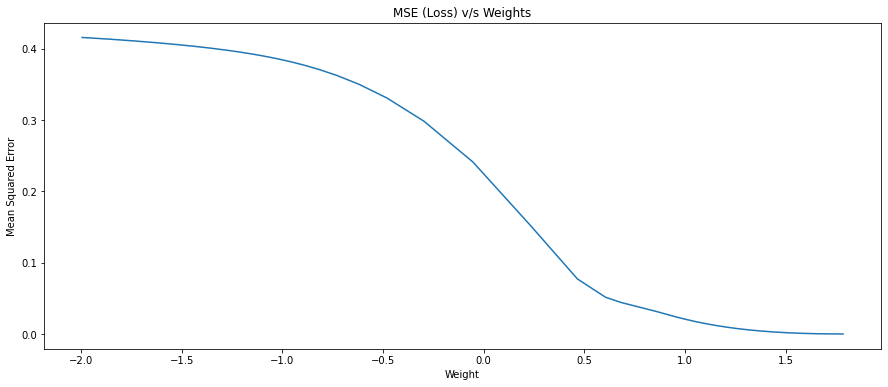

In [32]:
plt.title("MSE (Loss) v/s Weights")
plt.plot([np.mean(w) for w in weights], [np.mean(i) for i in errors])
plt.xlabel('Weight')
plt.ylabel('Mean Squared Error')
plt.show()

<h3>Batch Gradient Descent</h3>

In [33]:
def batch_gradient_descent(X, Y):
  w, c, b, noofepochs, dw, db = -2, 1, -2, 500, 0, 0
  y_hat_mega_list = []
  error_mega_list = []
  weights_mega_list = []
  bias_mega_list = []
  
  for i in range(noofepochs):
    y_hat_list = []
    error_list = []
    for x, y in zip(X, Y):
      Y_hat = find_Y_hat(x, w, b)   # in an epoch the weight is not getting updated until all the patterns have been seen
      y_hat_list.append(Y_hat)
      error_list.append((y - Y_hat) ** 2)
      dw += delta_w(x, y, Y_hat, c)
      db += delta_b(x, y, Y_hat, c)
    
    w += dw / 2   # after all patterns are introduced in an epoch, update the weight by the average of the error that has been recorded (dw)
    b += db / 2
    dw, db = 0, 0
    y_hat_mega_list.append(y_hat_list)
    error_mega_list.append(error_list)
    weights_mega_list.append(w)
    bias_mega_list.append(b)
    
    # print(f"Epoch {i + 1}, w = {w} & b = {b} | Y_hat: {y_list}")
  return y_hat_mega_list, error_mega_list, weights_mega_list, bias_mega_list


#### Caller

In [34]:
y_hats, errors, weights, biases = batch_gradient_descent(X, Y)

<h3>Observations / Results</h3>

#### MSE v/s Epochs

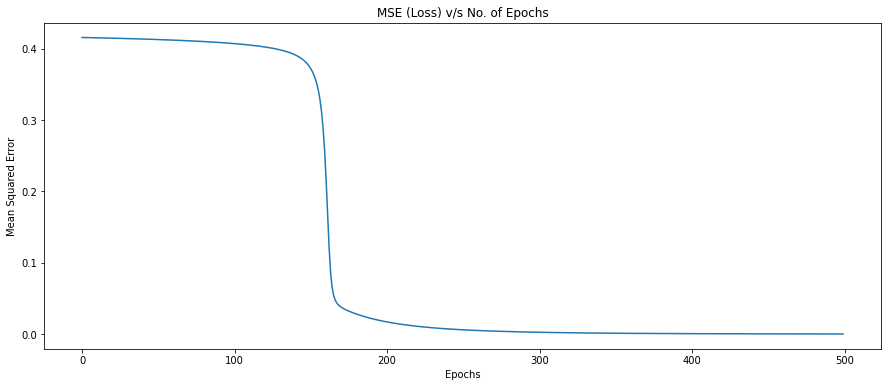

In [35]:
plt.title("MSE (Loss) v/s No. of Epochs")
plt.plot([i for i in range(noofepochs)], [np.mean(i) for i in errors])
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

#### Accuracy v/s Epochs

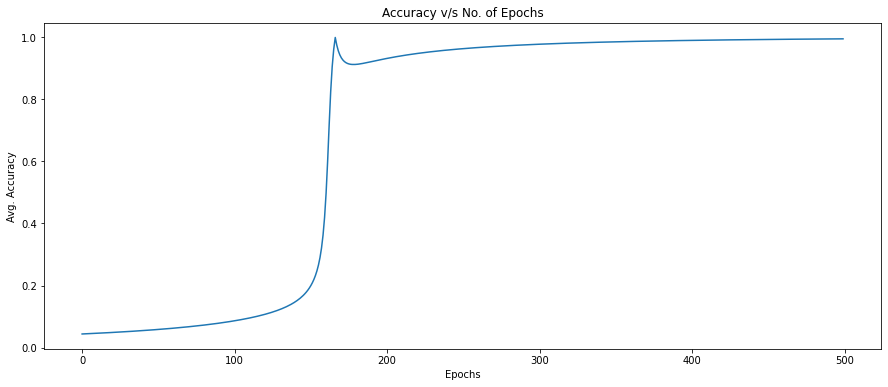

In [36]:
acc = [1 - np.abs((np.mean(Y) - np.mean(i)) / np.mean(Y)) for i in y_hats]
plt.title("Accuracy v/s No. of Epochs")
plt.plot([i for i in range(noofepochs)], acc)
plt.xlabel('Epochs')
plt.ylabel('Avg. Accuracy')
plt.show()

#### Weights (Avg.) v/s No. of epochs

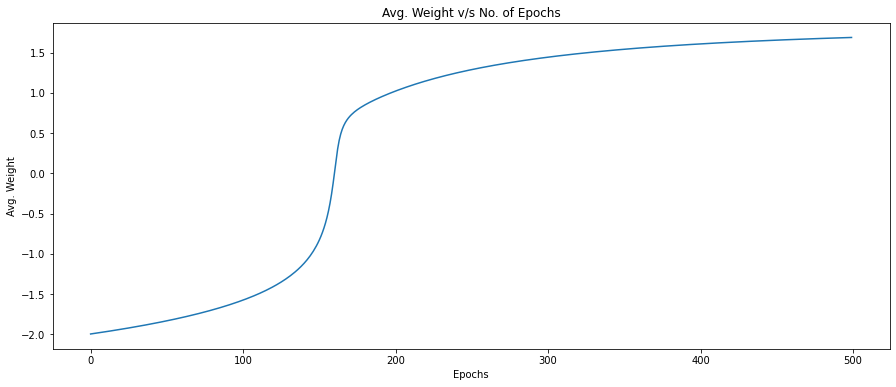

In [37]:
plt.title("Avg. Weight v/s No. of Epochs")
plt.plot([i for i in range(noofepochs)], weights)
plt.xlabel('Epochs')
plt.ylabel('Avg. Weight')
plt.show()

#### Loss v/s Weights

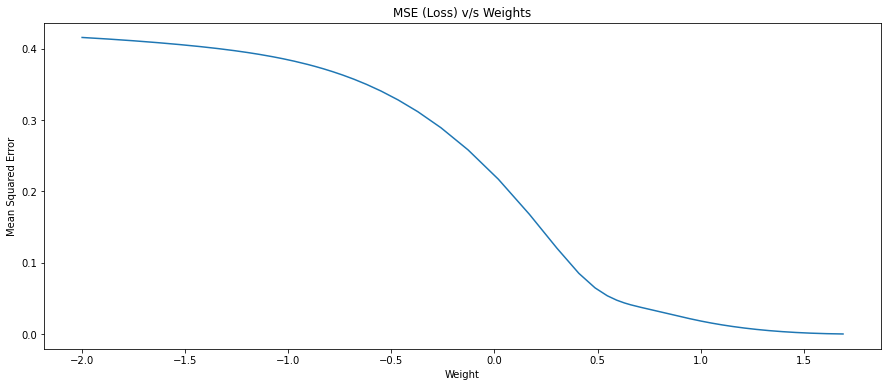

In [38]:
plt.title("MSE (Loss) v/s Weights")
plt.plot(weights, [np.mean(i) for i in errors])
plt.xlabel('Weight')
plt.ylabel('Mean Squared Error')
plt.show()